# 4.2, 4.3

In [64]:
D <- read.csv("DST_BIL54.csv")
D$time <- as.POSIXct(paste0(D$time,"-01"), "%Y-%m-%d", tz="UTC")
## Year to month for each of them
D$year <- 1900 + as.POSIXlt(D$time)$year + as.POSIXlt(D$time)$mon / 12
## Make the output variable a floating point (i.e.\ decimal number)
D$total <- as.numeric(D$total) / 1E6
## Divide intro train and test set
teststart <- as.POSIXct("2024-01-01", tz="UTC")
Dtrain <- D[D$time < teststart, ]
Dtest <- D[D$time >= teststart, ]
xx <- Dtrain$year 
y <- Dtrain$total
x <-cbind(1,xx)




## define lambda(t)
#lambda_t <- function(t,l,N){return(l^(N-t))}
N <-length((y))


parameter_list <- matrix(NA, nrow=N, ncol=2)


R_1 <- x[1,]%*%t(x[1,])
h_1 <- x[1,]*y[1]


R_2 <- R_1 + x[2,] %*% t(x[2,])
h_2 <- h_1 + x[2,] * y[2]

# we estimate theta (for the first time - so not yet using "update" formula):

h_3 <- h_2 + x[3,] * y[3]
R <- R_2 + x[3,] %*% t(x[3,])
parameter_list[3,] <- solve(R) %*% h_3

for (i in 4:N) {
R <- R + x[i,] %*% t(x[i,])  # Update R
parameter_list[i,] <- parameter_list[i-1,] + (solve(R) %*% x[i,]) %*% (y[i] - t(x[i,]) %*% parameter_list[i-1,])  # Update parameter
}
parameter_list[N,]


[1] -110.35541940    0.05614455

# 4.4

In [65]:
D <- read.csv("DST_BIL54.csv")
D$time <- as.POSIXct(paste0(D$time,"-01"), "%Y-%m-%d", tz="UTC")
## Year to month for each of them
D$year <- 1900 + as.POSIXlt(D$time)$year + as.POSIXlt(D$time)$mon / 12
## Make the output variable a floating point (i.e.\ decimal number)
D$total <- as.numeric(D$total) / 1E6
## Divide intro train and test set
teststart <- as.POSIXct("2024-01-01", tz="UTC")
Dtrain <- D[D$time < teststart, ]
Dtest <- D[D$time >= teststart, ]
xx <- Dtrain$year 
y <- Dtrain$total
x <-cbind(1,xx)




## define lambda(t)
#lambda_t <- function(t,l,N){return(l^(N-t))}
N <-length((y))


parameter_list <- matrix(NA, nrow=N, ncol=2)


R_1 <- x[1,]%*%t(x[1,])
h_1 <- x[1,]*y[1]


R_2 <- 0.9*R_1 + x[2,] %*% t(x[2,])
h_2 <- 0.9*h_1 + x[2,] * y[2]



h_3 <- 0.9*h_2 + x[3,] * y[3]
R <- 0.9*R_2 + x[3,] %*% t(x[3,])
parameter_list[3,] <- solve(R) %*% h_3

for (i in 4:N) {
R <- R * 0.9 + x[i,] %*% t(x[i,])  # Update R
parameter_list[i,] <- parameter_list[i-1,] + (solve(R) %*% x[i,]) %*% (y[i] - t(x[i,]) %*% parameter_list[i-1,])  # Update parameter
}
parameter_list[N,]

[1] -52.4828621   0.0275299

In [66]:
D <- read.csv("DST_BIL54.csv")
D$time <- as.POSIXct(paste0(D$time,"-01"), "%Y-%m-%d", tz="UTC")
## Year to month for each of them
D$year <- 1900 + as.POSIXlt(D$time)$year + as.POSIXlt(D$time)$mon / 12
## Make the output variable a floating point (i.e.\ decimal number)
D$total <- as.numeric(D$total) / 1E6
## Divide intro train and test set
teststart <- as.POSIXct("2024-01-01", tz="UTC")
Dtrain <- D[D$time < teststart, ]
Dtest <- D[D$time >= teststart, ]
xx <- Dtrain$year 
y <- Dtrain$total
x <-cbind(1,xx)




## define lambda(t)
#lambda_t <- function(t,l,N){return(l^(N-t))}
N <-length((y))


parameter_list <- matrix(NA, nrow=N, ncol=2)
R_initial <- diag(0.0000001,nrow = 2,ncol = 2)
h_1 <- x[1,]*y[1]
R <- 0.9*R_initial + x[1,] %*% t(x[1,])
parameter_list[1,] <- solve(R) %*% h_1

for (i in 2:N) {
R <- R * 0.9 + x[i,] %*% t(x[i,])  # Update R
parameter_list[i,] <- parameter_list[i-1,] + (solve(R) %*% x[i,]) %*% (y[i] - t(x[i,]) %*% parameter_list[i-1,]) }
parameter_list[N,] 

[1] -52.48106382   0.02752901

# CREATE FUNCTION TO FIND THE BEST LAMBDA

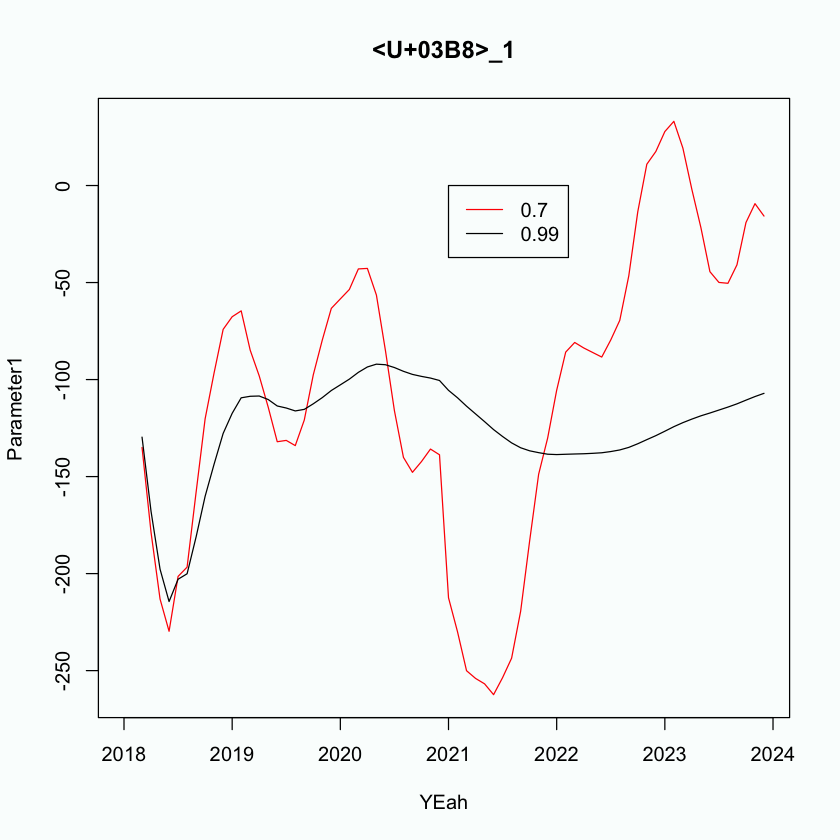

In [71]:
Recursiveestimation <- function(lambda) {D <- read.csv("DST_BIL54.csv")
D$time <- as.POSIXct(paste0(D$time,"-01"), "%Y-%m-%d", tz="UTC")
## Year to month for each of them
D$year <- 1900 + as.POSIXlt(D$time)$year + as.POSIXlt(D$time)$mon / 12
## Make the output variable a floating point (i.e.\ decimal number)
D$total <- as.numeric(D$total) / 1E6
## Divide intro train and test set
teststart <- as.POSIXct("2024-01-01", tz="UTC")
Dtrain <- D[D$time < teststart, ]
Dtest <- D[D$time >= teststart, ]
xx <- Dtrain$year 
y <- Dtrain$total
x <-cbind(1,xx)




## define lambda(t)
#lambda_t <- function(t,l,N){return(l^(N-t))}
N <-length((y))


parameter_list <- matrix(NA, nrow=N, ncol=2)


R_1 <- x[1,]%*%t(x[1,])
h_1 <- x[1,]*y[1]


R_2 <- lambda*R_1 + x[2,] %*% t(x[2,])
h_2 <- lambda*h_1 + x[2,] * y[2]



h_3 <- lambda*h_2 + x[3,] * y[3]
R <- lambda*R_2 + x[3,] %*% t(x[3,])
parameter_list[3,] <- solve(R) %*% h_3

for (i in 4:N) {
R <- R * lambda + x[i,] %*% t(x[i,])  # Update R
parameter_list[i,] <- parameter_list[i-1,] + (solve(R) %*% x[i,]) %*% (y[i] - t(x[i,]) %*% parameter_list[i-1,])  # Update parameter
}
return(parameter_list[,1])}
par(bg = "#fafdfd")

plot(Dtrain$year,Recursiveestimation(0.7),"l",col = "red",xlab = "YEah",ylab = "Parameter1",main = "")
points(Dtrain$year,Recursiveestimation(0.99),"l",col = "black")
legend(2021,0,c("0.7","0.99"), lty=rep(1,2), col=c("red","black"))


pt 2 recursive